## Neemiracle Technologies
## Name : Sheema Masood 
## Data Science Internship
### SEPTEMBER 2024 - B1
--------------------------------------------------------------------------------------------------------------------------------------------------------

# Task Object Classification Using Convolutional Neural Networks (CNNs)

### Objective
#### Develop an image classification model using Convolutional Neural Networks (CNNs) to categorize images into different classes.

### Task Roadmap

#### 1. Data Collection
- **Dataset:** Use an image classification dataset with labeled images (e.g., CIFAR-10, MNIST).
- **Review:** Review image features and class labels.

#### 2. Data Preprocessing
- **Resize and Normalize:** Resize and normalize images.
- **Data Augmentation:** Augment data to improve model performance.

#### 3. Model Building
- **CNN Architecture:** Build a CNN architecture with layers such as Convolutional, Pooling, and Dense layers.
- **Training and Evaluation:** Train the model and evaluate its performance using metrics like accuracy.

#### 4. Deployment
- **Deploy the Model:** Deploy the model using a web framework for real-time image classification.
- **User Interface:** Create a user interface to upload and classify images.
and classify images.


## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [2]:
# Import necessary modules
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.utils.class_weight import compute_class_weight

In [24]:
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [25]:
# Check the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')


Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [26]:
# Define the class names and labels_map
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_map = {i: class_name for i, class_name in enumerate(class_names)}


--------------------------------------------------------------------------------

### Visualize a Few Images with Their Labels

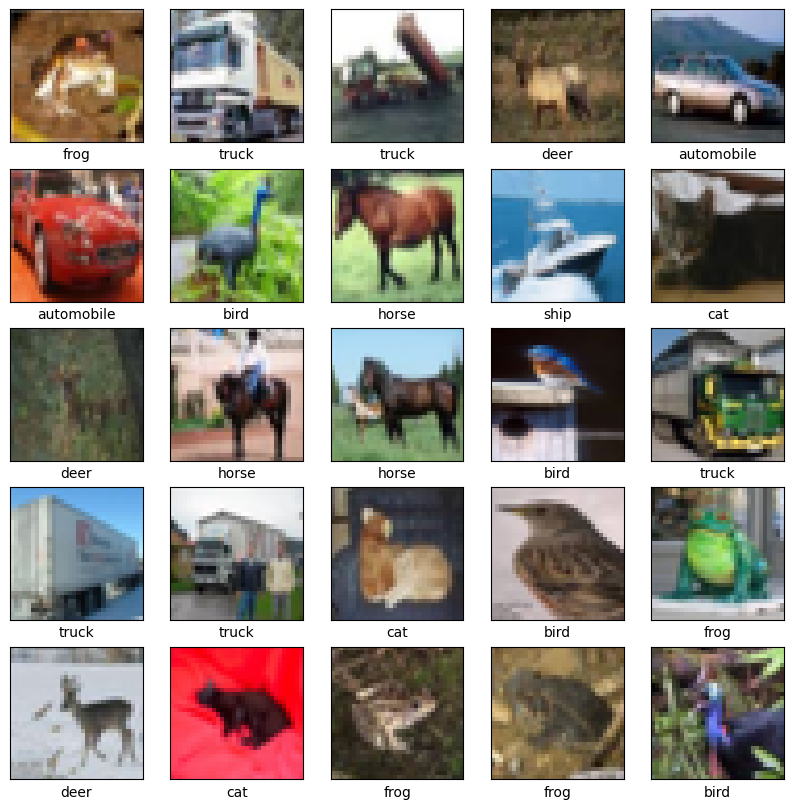

In [27]:
# Display the first few images with their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


### The blurriness won't affect the performance of CNN since the model will be trained on the original 32x32 images but to visualize we can adjust its resolution for clarity


## Improving Image Display Clarity

#### Let's adjust the display so that the images are shown in their native 32x32 pixel resolution. By displaying them at a smaller size, the images will appear clearer and less pixelated.

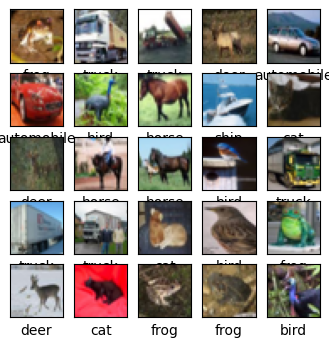

In [28]:
# Display the first few images with their labels at native resolution
plt.figure(figsize=(4,4))  # Smaller figure size to match the resolution
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]], fontsize=10)
plt.show()


### Review Image Features:

In [29]:
# Check the shape of the dataset
print(f'Training data shape: {train_images.shape}')
print(f'Testing data shape: {test_images.shape}')
print(f'Number of training samples: {train_images.shape[0]}')
print(f'Number of testing samples: {test_images.shape[0]}')

Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000


In [30]:
# Display data type and range of pixel values
print(f'Data type of images: {train_images.dtype}')
print(f'Minimum pixel value: {train_images.min()}')
print(f'Maximum pixel value: {train_images.max()}')


Data type of images: uint8
Minimum pixel value: 0
Maximum pixel value: 255


#### Check Missing Values in Images

In [31]:
# Check for missing values in image arrays
if np.any(np.isnan(train_images)) or np.any(np.isnan(test_images)):
    print("Missing values found in images.")
else:
    print("No missing values in images.")


No missing values in images.


## Review Class Labels:

In [32]:
# Print class names
print("Class names:", class_names)

# Display the first 10 labels from the training set
print("First 10 labels (numeric):", train_labels[:10].flatten())
print("First 10 labels (class names):", [class_names[i[0]] for i in train_labels[:10]])

Class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
First 10 labels (numeric): [6 9 9 4 1 1 2 7 8 3]
First 10 labels (class names): ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


#### Check Missing Values in Labels

In [33]:
# Check for missing values in labels array
if np.any(np.isnan(train_labels)):
    print("Missing values found in training labels.")
else:
    print("No missing values in training labels.")

if np.any(np.isnan(test_labels)):
    print("Missing values found in test labels.")
else:
    print("No missing values in test labels.")


No missing values in training labels.
No missing values in test labels.


### Summary of Review of Image Features and Class Labels

#### Image Features:
- CIFAR-10 images are 32x32 pixels in size with 3 color channels.
- Pixel values range from 0 to 255.
- No missing image

#### Class Labels:
- The dataset has 10 classes, each represented by numeric labels (0-9).
- We've visually inspected a few images and their labels.
- No missing labels

-----------------------------------------------------------------------

## Visualize Class Distribution
For Image Data Loaded from Keras:
- Step 1: Convert Labels to a Numpy Array

In [34]:
# Flatten labels to 1D array
train_labels = train_labels.flatten()
test_labels = test_labels.flatten()

- Step 2: Count and Plot Class Distribution

In [35]:
# Count occurrences of each class in training data
unique_train, counts_train = np.unique(train_labels, return_counts=True)
class_counts_train = dict(zip(unique_train, counts_train))

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_counts_train.keys(), class_counts_train.values())
plt.title('Class Distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(ticks=list(class_counts_train.keys()), labels=[f'Class {i}' for i in class_counts_train.keys()])
plt.savefig("Class Distribution in Training Data.png")
plt.show()

------------------------------------------------------------------------------------------------------

## Data Preprocessing:

#### 1. Normalizing the Images
Normalization typically involves scaling the pixel values from their original range of 0-255 to a range of 0-1. This is done by dividing each pixel value by 255.

In [36]:
# Normalize the images to the range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify normalization by checking the new range of pixel values
print(f'Minimum pixel value after normalization: {train_images.min()}')
print(f'Maximum pixel value after normalization: {train_images.max()}')


Minimum pixel value after normalization: 0.0
Maximum pixel value after normalization: 1.0


#### 2. Data Augmentation
Data augmentation is used to artificially increase the size of the training dataset by creating modified versions of images in the dataset. This helps improve the model's generalization by introducing variability.

we can use Keras' ImageDataGenerator to perform data augmentation:

In [37]:
datagen = ImageDataGenerator(
    rotation_range=15,         # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,     # Randomly shift images horizontally by up to 10%
    height_shift_range=0.1,    # Randomly shift images vertically by up to 10%
    horizontal_flip=True,      # Randomly flip images horizontally
    zoom_range=0.1             # Randomly zoom into images by up to 10%
)


In [38]:
# Fit the generator on the training data
datagen.fit(train_images)


In [39]:
# Display a few augmented images
plt.figure(figsize=(2,2))
for X_batch, y_batch in datagen.flow(train_images[:9], train_labels[:9], batch_size=9):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(X_batch[i])
        plt.xlabel(class_names[y_batch[i]])
    plt.show()
    break  # We only want to visualize one batch of augmented images


### 3. One Hot Encoding of Class LAbels

In [40]:
# One-hot encode the labels
train_labels_one_hot = to_categorical(train_labels, num_classes=10)
test_labels_one_hot = to_categorical(test_labels, num_classes=10)

### Summary of Data Preprocessing

#### 1. Normalization:
- **Rescaled** the pixel values of the images from the range [0, 255] to [0, 1].
- This scaling helps improve the training process by ensuring that all input values are on a similar scale.

#### 2. Data Augmentation:
- Applied various data augmentation techniques to the training dataset to improve model generalization, including:
  - **Rotation**: Randomly rotated images by up to 15 degrees.
  - **Shifts**: Applied horizontal and vertical shifts to the images by up to 10% of the total width/height.
  - **Horizontal Flips**: Randomly flipped images horizontally.
  - **Zoom**: Applied random zooms to the images by up to 10%.
- **Fit the data generator** on the training data to create augmented versions during training.
- 

#### 3. One hot encoding of labels

#### Output:
- Ensured that the training data is more diverse and better suited to prevent overfitting, leading to a more robust model.


------------------------------------------------------------------------------------------------------------------------------

# Model Building

### 1. Build the CNN Architecture

We'll start by defining the CNN architecture. A typical CNN consists of multiple convolutional layers followed by pooling layers and dense layers.ax activation function to output class probabilities.

## Convolutional Layers:

**First Convolutional Layer:**
- Applies 32 convolutional filters of size 3x3 to the input image with ReLU activation. Padding is set to 'same' to maintain spatial dimensions. Includes L2 regularization to reduce overfitting.
  
**Batch Normalization:**
- Normalizes the activations of the previous layer to stabilize and accelerate training.
  
**Second Convolutional Layer:**
- Applies another 32 convolutional filters of size 3x3 with ReLU activation. Includes L2 regularization.
  
**MaxPooling Layer:**
- Reduces spatial dimensions by taking the maximum value in 2x2 blocks, helping with downsampling and reducing computational complexity.
  
**Dropout:**
- Randomly sets 20% of the inputs to zero during training to prevent overfitting.
  
**Third and Fourth Convolutional Layers:**
- Applies 64 convolutional filters of size 3x3 with ReLU activation. Batch normalization follows each convolution to further stabilize and accelerate training.
  
**Second MaxPooling Layer:**
- Further reduces the spatial dimensions of the feature maps.
  
**Dropout:**
- Randomly sets 30% of the inputs to zero during training to mitigate overfitting.
  
**Fifth and Sixth Convolutional Layers:**
- Applies 128 convolutional filters of size 3x3 with ReLU activation. Batch normalization follows each convolution to stabilize training.
  
**Third MaxPooling Layer:**
- Further reduces the spatial dimensions.
  
**Dropout:**
- Randomly sets 40% of the inputs to zero during training to further address overfitting.
  
**Seventh and Eighth Convolutional Layers:**
- Applies 256 convolutional filters of size 3x3 with ReLU activation. Batch normalization follows each convolution to stabilize training.
  
**Fourth MaxPooling Layer:**
- Further reduces the spatial dimensions of the feature maps.
  
**Dropout:**
- Randomly sets 50% of the inputs to zero during training to further prevent overfitting.
  
## Flatten Layer:

**Flatten Layer:**
- Converts the 2D feature maps into a 1D vector, preparing the data for the fully connected layers.
  
## Fully Connected Layer:

**Dense Layer:**
- A fully connected layer with 10 units (one for each class) and a softmax activation function to output class probabilities.

In [41]:
# Initialize a Sequential model
model = Sequential()

# Add the Input layer
model.add(Input(shape=(32, 32, 3)))

# First Convolutional Block
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second Convolutional Block
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third Convolutional Block
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Fourth Convolutional Block
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))  # Additional dense layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(10, activation='softmax'))


# Display the model's architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,308,586 (4.99 MB)

 Trainable params: 1,306,666 (4.98 MB)

 Non-trainable params: 1,920 (7.50 KB)

## Model Summary:

Our model consists of **1,308,586 parameters**, out of which **1,306,666 are trainable**. This indicates that the vast majority of the model's parameters are involved in the learning process.

This parameter count is relatively compact compared to more advanced architectures, which often have tens or even hundreds of millions of parameters. This compactness can be advantageous for reducing computational requirements and training time, while still allowing for effective learning.

##  Compile the Model
Compiling the model to specify the optimizer, loss function, and metrics to be used during training


In [30]:
# Compile the model using SGD with momentum
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])


--------------------------------------------------------------------------

## Train the Model

In [31]:
# Learning rate scheduler and early stopping
lr_scheduler = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# Then start training
history = model.fit(
    train_images, train_labels_one_hot,
    epochs=100,
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)

Epoch 1/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.2000 - loss: 2.3453
Epoch 1: val_accuracy improved from -inf to 0.36450, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 399s 435ms/step - accuracy: 0.2001 - loss: 2.3450 - val_accuracy: 0.3645 - val_loss: 1.7449 - learning_rate: 0.0100
Epoch 2/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - accuracy: 0.3399 - loss: 1.8606
Epoch 2: val_accuracy improved from 0.36450 to 0.42630, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 335s 428ms/step - accuracy: 0.3399 - loss: 1.8605 - val_accuracy: 0.4263 - val_loss: 1.6883 - learning_rate: 0.0100
Epoch 3/100
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.4297 - loss: 1.6792
Epoch 3: val_accuracy improved from 0.42630 to 0.52360, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 417ms/step - accuracy: 0.4297 - loss: 1.6791 - val_accuracy: 0.5236 - val_loss: 1.4447 - learning_rate: 0.0100
Epoch 4/100
782/782 ━━━━━━━━━━━━━━

### Analysis of Current Model Performance

Our model is showing promising results with a training accuracy of **91.97%** and a validation accuracy of **86.48%** at epoch 40. 
## Continuing Training with Reduced Learning Rate

Aer 40 epochs , , the validation accuracy plateaued, indicating that the model might have reached its peak performance with the current learning rate. To further fine-tune the model, we decided to reduce the learning rate by 10% and continue training for 5 more epochs.

### Steps Taken:
1. **Reduced Learning Rate**: The learning rate was decreased from its current value by 10% to allow for more fine-tuned adjustments to the model weights.
2. **Continued Training**: The model was trained for an additional 5 epochs with the new, lower learning rate. This approach aims to squeeze out additional performance improvements while avoiding overshooting optimal weights.

### Rationale:
- **Learning Rate Reduction**: As the training progresses, reducing the learning rate can help the model make smaller, more precise updates to the weights, potentially improving performance without overfitting.

The training process was monitored using the same callbacks: early stopping, learning rate reduction on plateau, and model checkpointing to save the best model based on validation accuracy.
kpoint]
)



In [39]:
# Reduce learning rate by 10%
current_lr = model.optimizer.learning_rate.numpy()
new_lr = current_lr * 0.1
model.optimizer.learning_rate.assign(new_lr)

# Train the model for 5 more epochs
history_continued = model.fit(
    train_images, train_labels_one_hot,
    epochs=5,  # Additional epochs
    batch_size=64,
    validation_data=(test_images, test_labels_one_hot),
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.9026 - loss: 0.4668
Epoch 1: val_accuracy improved from 0.86480 to 0.86530, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 440s 514ms/step - accuracy: 0.9026 - loss: 0.4668 - val_accuracy: 0.8653 - val_loss: 0.6108 - learning_rate: 5.0000e-04
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.9095 - loss: 0.4462
Epoch 2: val_accuracy improved from 0.86530 to 0.86580, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 344s 439ms/step - accuracy: 0.9095 - loss: 0.4462 - val_accuracy: 0.8658 - val_loss: 0.6118 - learning_rate: 5.0000e-04
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.9104 - loss: 0.4449
Epoch 3: val_accuracy improved from 0.86580 to 0.86650, saving model to best_model.keras
782/782 ━━━━━━━━━━━━━━━━━━━━ 327s 418ms/step - accuracy: 0.9104 - loss: 0.4449 - val_accuracy: 0.8665 - val_loss: 0.6127 - learning_rate: 5.0000e-04
Epoch 4/5
782/782 ━━━━━━━

## Summary of Additional Training with Reduced Learning Rate

### Performance Overview
After training the model for 5 additional epochs with a reduced learning rate (from 0.005 to 0.0005):

- **Validation Accuracy**:
  - Improved slightly from 86.48% to 86.75%, indicating a marginal improvement in the model's ability to generalize to unseen data.
  - The highest validation accuracy achieved was 86.75%, which was saved as the best model.

- **Training Accuracy**:
  - Increased from **90.26%** to **91.27%**, showing that the model continues to learn from the training data, albeit with smaller improvements.

- **Loss**:
  - Both training and validation losses showed minor changes, with the final training loss at 0.4356 and validation loss at 0.6127.

### Key Observations
- **Marginal Improvements**: The model achieved slight improvements in both validation accuracy and training accuracy, suggesting that the learning rate reduction helped in fine-tuning the model.
- **Stable Validation Loss**: The validation loss remained relatively stable, indicating that the model is not overfitting despite the extended training.

### Conclusion
Given the slight improvement in validation accuracy and the overall stability in performance metrics, this version of the model can be considered well-tuned and ready for deployment. The model saved at epoch 4/5, with a validation accuracy of 86.75%, is recommended for deployment.


-------------------------------------------------------------------------------------------------

## Evaluate the Model

### 1. Load the best model 
Since I've saved the best model during training, start by loading it to ensure we are  evaluating the most optimal version.

In [43]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('best_model.keras')


#### 2. Evaluation on test set

In [44]:
# Evaluate the model on the test data
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels_one_hot, verbose=1)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.8676 - loss: 0.6146
Test Accuracy: 86.75%
Test Loss: 0.6122


#### 3. Generate Predictions

In [45]:
# Ensure your labels are in class index format
if len(test_labels_one_hot.shape) > 1 and test_labels_one_hot.shape[1] != 1:
    true_classes = np.argmax(test_labels_one_hot, axis=1)

In [46]:
# Get the predicted classes from model predictions
predictions = best_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


In [47]:
# Convert class indices to human-readable labels using the mapping dictionary
# Assuming labels_map is a dictionary mapping indices to class names
true_labels = np.vectorize(labels_map.get)(true_classes)
predicted_labels = np.vectorize(labels_map.get)(predicted_classes)


#### 4. Classification Report

In [48]:
# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=list(labels_map.values()))
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    airplane       0.89      0.89      0.89      1000
  automobile       0.94      0.93      0.93      1000
        bird       0.84      0.78      0.81      1000
         cat       0.74      0.73      0.73      1000
        deer       0.83      0.87      0.85      1000
         dog       0.80      0.79      0.80      1000
        frog       0.87      0.92      0.90      1000
       horse       0.92      0.91      0.91      1000
        ship       0.93      0.92      0.92      1000
       truck       0.91      0.93      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### 5. Confusion Matrix

In [51]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=list(labels_map.values()))

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(labels_map.values()), yticklabels=list(labels_map.values()))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("Confusion Matrix.png")
plt.show()


### 6. Receiver Operating Characteristic (ROC) Curve

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step - accuracy: 0.8676 - loss: 0.6146
Test Loss: 0.6122019290924072
Test Accuracy: 0.8675000071525574
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step


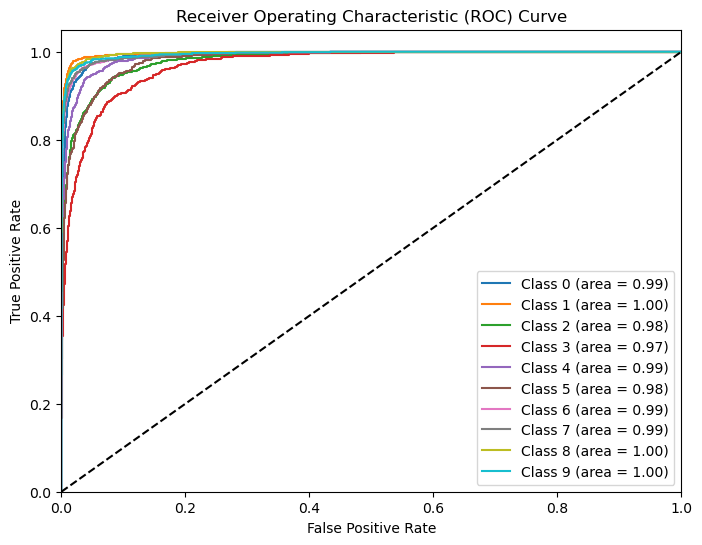

313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 54ms/step


In [50]:
# Evaluate the model on the test set
test_loss, test_accuracy = best_model.evaluate(test_images, test_labels_one_hot, verbose=1)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

# Define the number of classes
num_classes = test_labels_one_hot.shape[1]

# Convert test_labels to binary format if they are not already
y_test_bin = label_binarize(test_labels, classes=np.arange(num_classes))

# Get predicted probabilities from the model
y_pred_probs = best_model.predict(test_images)

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.savefig("Receiver Operating Characteristic (ROC) Curve.png")
plt.show()

# Predict the classes for the test data
predictions = best_model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_one_hot, axis=1)


### 7. Misclassified instances

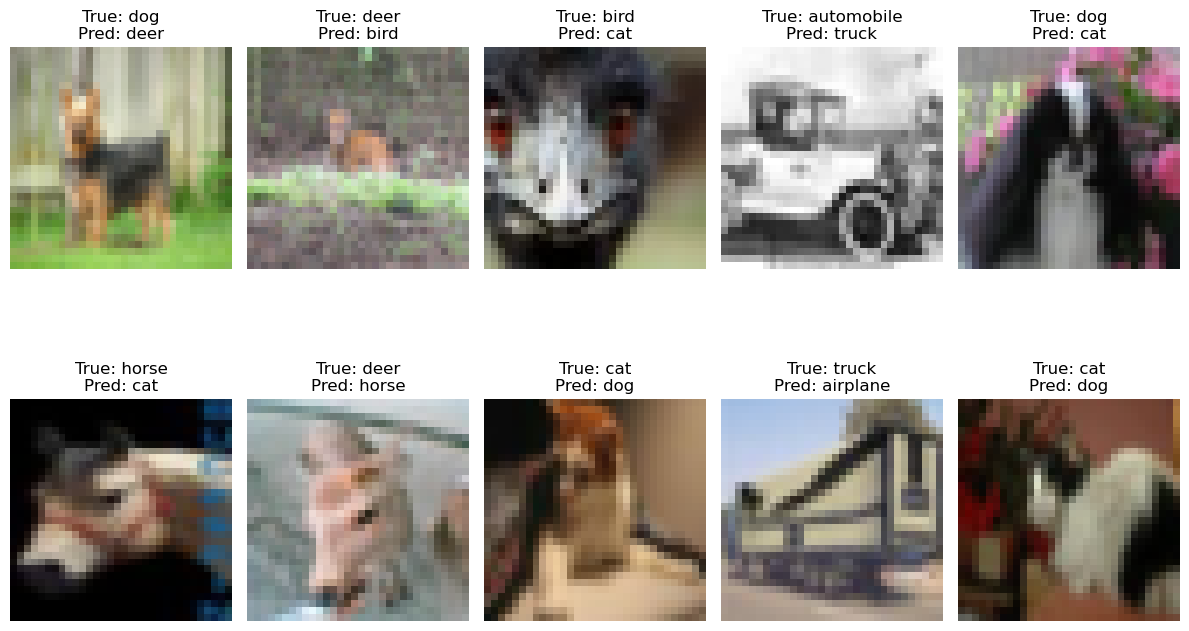

In [52]:
# Find misclassified instances
incorrect = np.where(predicted_classes != true_classes)[0]
num_incorrect = len(incorrect)

# Display up to 10 misclassified images
plt.figure(figsize=(12, 8))
for i, index in enumerate(incorrect[:10]):
    plt.subplot(2, 5, i + 1)
    img = test_images[index]
    
    # Check if the image needs to be rescaled or adjusted
    if img.max() <= 1.0:  # Normalized image
        img = (img * 255).astype(np.uint8)
    
    if img.shape[-1] == 1:  # Grayscale image
        plt.imshow(img.squeeze(), cmap='gray')
    else:  # RGB image
        plt.imshow(img)
    
    plt.title(f'True: {class_names[true_classes[index]]}\nPred: {class_names[predicted_classes[index]]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig("Misclassified Instances.png")
plt.show()


-----------------------------------------------------------------

#### To Test our Model

In [55]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt

# Define the class names and labels_map
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_map = {i: class_name for i, class_name in enumerate(class_names)}

# Function to preprocess the image and make a prediction
def preprocess_and_predict(model, img_path, target_size=(32, 32)):
    """
    Preprocess the image and predict its class using the trained model.
    
    Args:
    - model: The trained Keras model.
    - img_path: Path to the image file.
    - target_size: Target size for the image (height, width).
    
    Returns:
    - predicted_class_name: The name of the predicted class.
    """
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # Normalize the image array
    
    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = labels_map.get(predicted_class_index, 'Unknown')  # Convert index to class name
    
    return predicted_class_name



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted Class: automobile


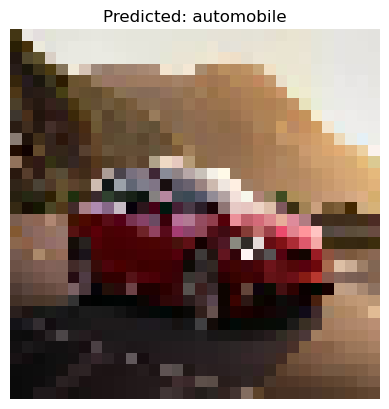

In [57]:
# Path to the image file
image_path = 'test1.jpeg'

# Load your trained model (Ensure `best_model` is properly defined in your script)
# For example: best_model = load_model('path_to_your_model.h5')

# Get the prediction
predicted_class_name = preprocess_and_predict(best_model, image_path)

print(f"Predicted Class: {predicted_class_name}")

# Visualizing the image with its prediction
img = image.load_img(image_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Predicted Class: 7


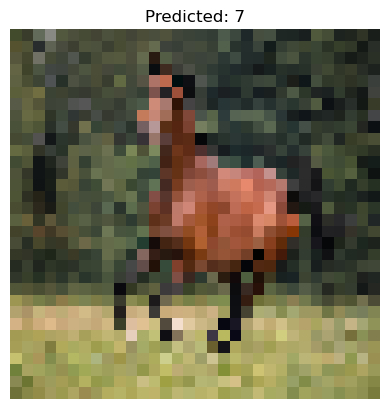

In [72]:
# Path to the image file
image_path = 'test.jpg'

# Load your trained model (Ensure `best_model` is properly defined in your script)
# For example: best_model = load_model('path_to_your_model.h5')

# Get the prediction
predicted_class_name = preprocess_and_predict(best_model, image_path)

print(f"Predicted Class: {predicted_class_name}")

# Visualizing the image with its prediction
img = image.load_img(image_path, target_size=(32, 32))
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
plt.axis('off')
plt.show()


In [38]:
# Save the entire model to a HDF5 file
best_model.save('my_cnn_model.keras')

print("Model saved successfully!")


Model saved successfully!


---------------------------------

# checking my prediction function results

313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 63ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.89      0.89      0.89      1000
  automobile       0.94      0.93      0.93      1000
        bird       0.84      0.78      0.81      1000
         cat       0.74      0.73      0.73      1000
        deer       0.83      0.87      0.85      1000
         dog       0.80      0.79      0.80      1000
        frog       0.87      0.92      0.90      1000
       horse       0.92      0.91      0.91      1000
        ship       0.93      0.92      0.92      1000
       truck       0.91      0.93      0.92      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



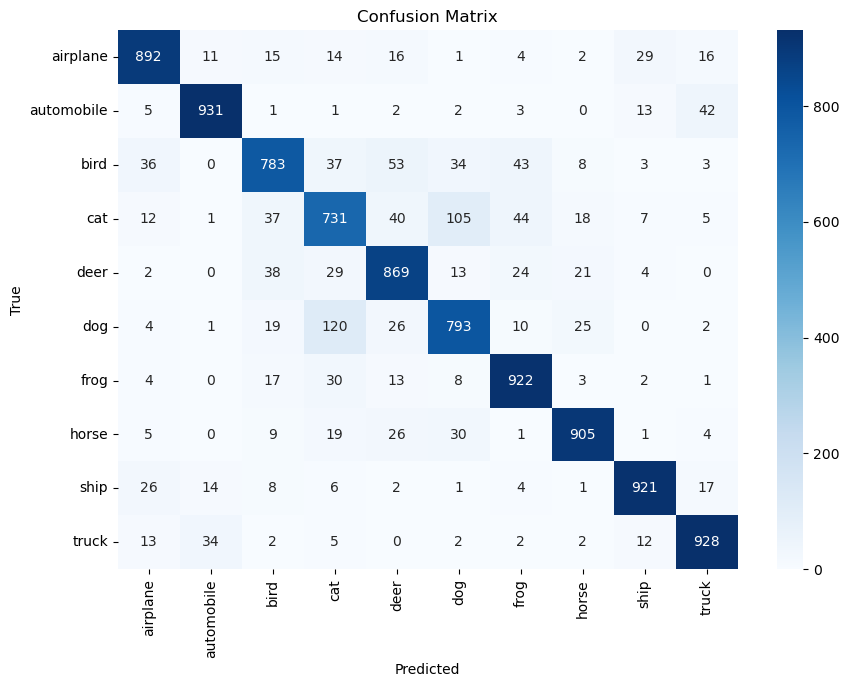

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Define class names and labels map
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_map = {i: class_name for i, class_name in enumerate(class_names)}

# Function to preprocess the image and make a prediction
def preprocess_and_predict(model, img_path, target_size=(32, 32)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)[0]
    
    return predicted_class

# Load the model
model = load_model('my_cnn_model.keras')

# Predict the probabilities
predictions = model.predict(test_images)

# Vectorize predictions and true labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels_one_hot, axis=1)
predicted_class_names = np.vectorize(labels_map.get)(predicted_classes)
true_class_names = np.vectorize(labels_map.get)(true_classes)

# Classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('Confusion matrix to check my predict function.png')
plt.show()
